In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

#show all columns on output 
pd.set_option('display.max_columns', 999) 

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel(r'D:\Nam3\HK2\DoAn2\DS-Customer Segmentation\Customer-Segmentation\data\online_retail_II.xlsx', sheet_name = 0)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


Exloratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [8]:
df.describe(include="O" )

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [9]:
df[df['Customer ID'].isna()].head(10) 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [10]:
df[df['Quantity']<0].head(10) 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [11]:
df['Invoice'] = df['Invoice'].astype("str")
df[df['Invoice'].str.match('^\\d{6}$') == False ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [12]:
df['Invoice'].str.replace('[0-9]','', regex = True).unique()


array(['', 'C', 'A'], dtype=object)

In [13]:
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [14]:
df['StockCode'] = df['StockCode'].astype('str')
df[(df['StockCode'].str.match('^\\d{5}$')== False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')== False) ]['StockCode'].unique()



array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [15]:
df[df['StockCode'].str.contains('^DOT')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [16]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


Data Cleaning

In [17]:
cleaned_df = df.copy()


In [18]:
cleaned_df['Invoice'] = df['Invoice'].astype('str')

mask = (
    cleaned_df['Invoice'].str.match('^\\d{6}$') == True 
    )

cleaned_df = cleaned_df[mask]

cleaned_df 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [19]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')

mask = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$") == True)
    | (cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-z]+$") == True)
    | (cleaned_df['StockCode'].str.match("^PADS$") == True)
)
cleaned_df = cleaned_df[mask]

cleaned_df 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [20]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,512796.00,512796,512796.00,406337.00
mean,11.00,2010-06-28 18:26:52.709732352,3.39,15373.63
min,-9600.00,2009-12-01 07:45:00,0.00,12346.00
25%,1.00,2010-03-21 13:27:00,1.25,14004.00
50%,3.00,2010-07-06 14:25:00,2.10,15326.00
75%,10.00,2010-10-15 14:50:00,4.21,16814.00
max,19152.00,2010-12-09 20:01:00,1157.15,18287.00
std,104.35,NaN,5.07,1677.37


In [21]:
cleaned_df.dropna(subset = ['Customer ID'], inplace = True) 

In [22]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [23]:
cleaned_df[cleaned_df['Price'] == 0] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.00,18071.00,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.00,14258.00,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.00,12417.00,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.00,16858.00,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.00,13047.00,United Kingdom


In [24]:
len(cleaned_df[cleaned_df['Price'] == 0]) 

28

In [25]:
cleaned_df = cleaned_df[cleaned_df['Price']>0 ]

In [26]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [27]:
cleaned_df['Price'].min()

0.001

In [28]:
len(cleaned_df)/len(df)

0.7732429238325965

Dropped about 23%

Feature Engineeringring

In [29]:
cleaned_df['SaleLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']

cleaned_df 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SaleLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [30]:
aggregated_df = cleaned_df.groupby(by = 'Customer ID', as_index =False) \
    .agg(
        MonetaryValue=('SaleLineTotal','sum'),
        Frequency=('Invoice','nunique'),
        LastInvoiceDate=('InvoiceDate','max') 

    )
aggregated_df.head()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [31]:
max_invoice_date = aggregated_df['LastInvoiceDate'].max()

print('Max_invoice_date:',max_invoice_date) 

aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days

aggregated_df.head()


Max_invoice_date: 2010-12-09 20:01:00


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


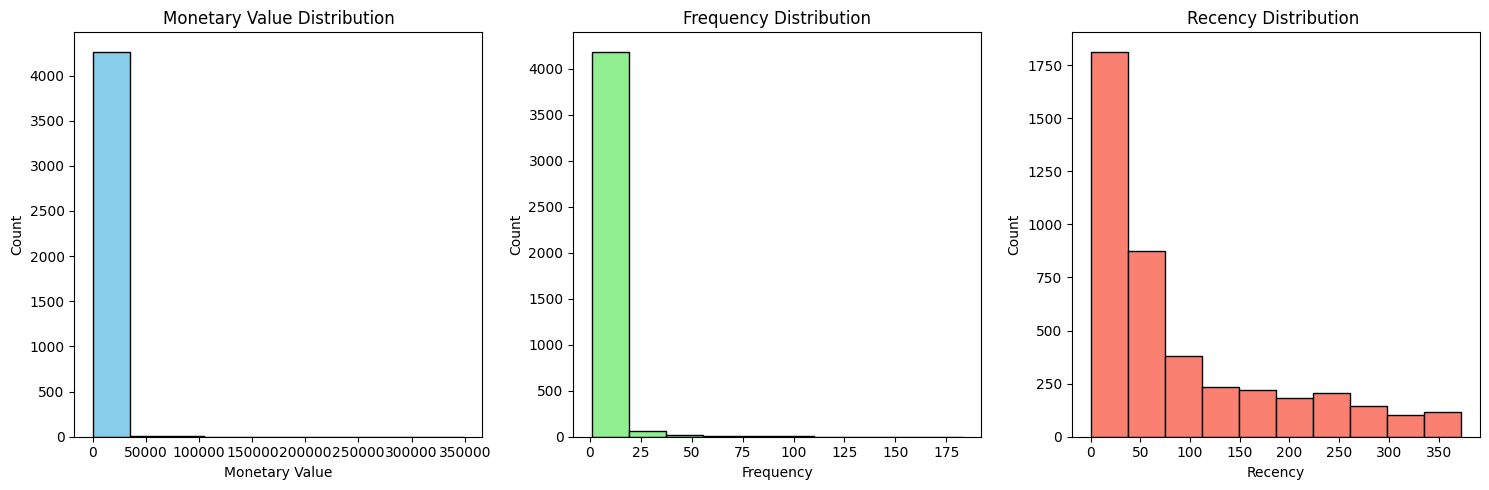

In [32]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'],bins= 10,color = 'skyblue',edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'],bins=10,color='lightgreen',edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'],bins=10,color='salmon',edgecolor='black')
plt.title('Recency Distribution ')
plt.xlabel('Recency')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

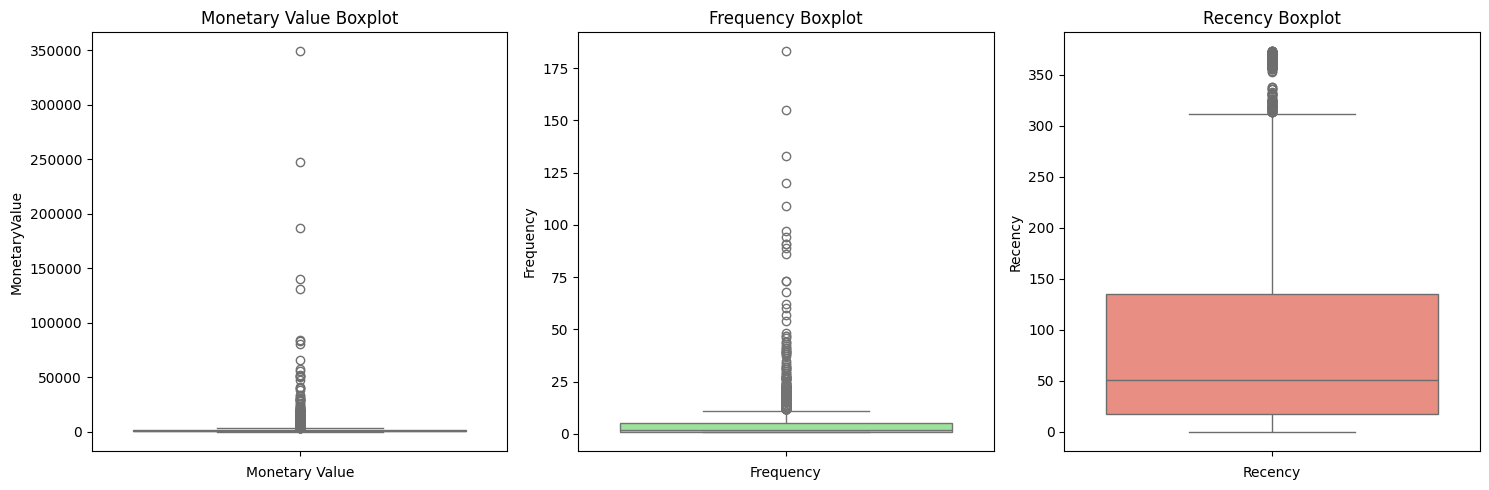

In [33]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df['Frequency'], color = 'lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df['Recency'], color ='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()


In [34]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3-M_Q1

monerary_outliers_df = aggregated_df[(aggregated_df['MonetaryValue'] > (M_Q3 + 1.5 * M_IQR))| (aggregated_df['MonetaryValue'] < (M_Q1 - 1.5 * M_IQR))].copy()

monerary_outliers_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [35]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3-F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR))| (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [36]:
R_Q1 = aggregated_df['Recency'].quantile(0.25)
R_Q3 = aggregated_df['Recency'].quantile(0.75)
R_IQR = R_Q3-R_Q1

recency_outliers_df = aggregated_df[(aggregated_df['Recency'] > (R_Q3 + 1.5 * R_IQR))| (aggregated_df['Recency'] < (R_Q1 - 1.5 * R_IQR))].copy()

recency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,167.00,167.00,167.00,167,167.00
mean,15429.03,418.32,1.25,2009-12-23 13:52:27.664670720,350.97
min,12439.00,2.95,1.00,2009-12-01 10:49:00,314.00
25%,14115.50,147.35,1.00,2009-12-07 13:03:00,328.50
50%,15413.00,231.90,1.00,2009-12-14 15:07:00,360.00
75%,16812.00,356.18,1.00,2010-01-14 23:56:00,367.00
max,18201.00,9471.50,7.00,2010-01-29 14:22:00,373.00
std,1629.84,950.15,0.80,NaN,20.51


In [37]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monerary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


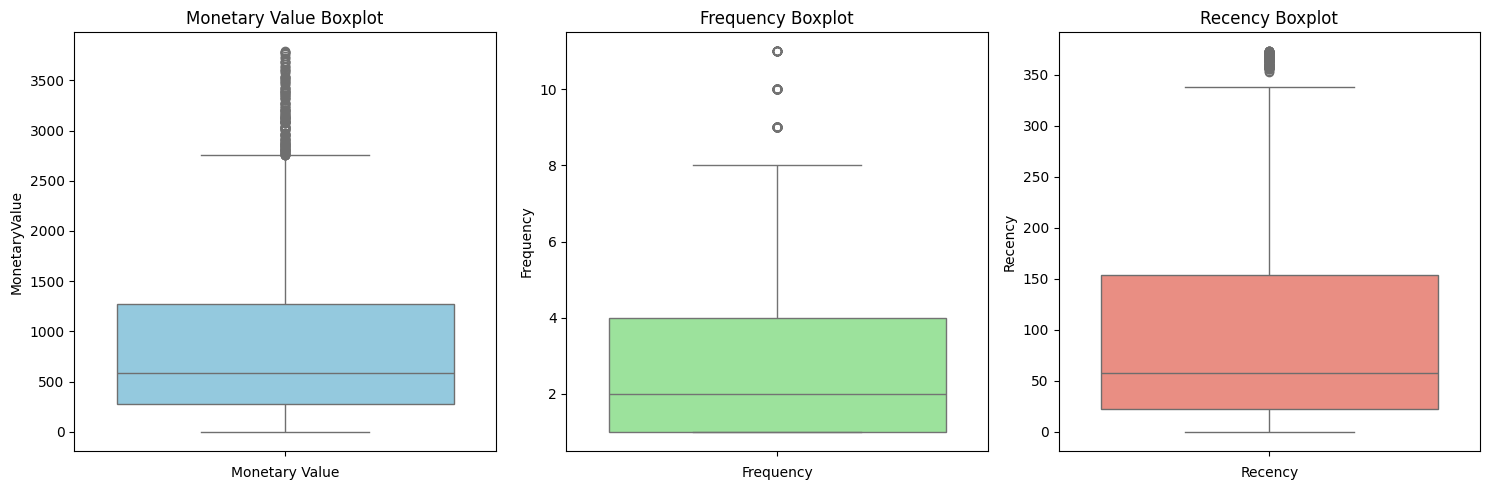

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data = non_outliers_df['MonetaryValue'], color = 'skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(data = non_outliers_df['Frequency'], color = 'lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data = non_outliers_df['Recency'], color = 'salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()



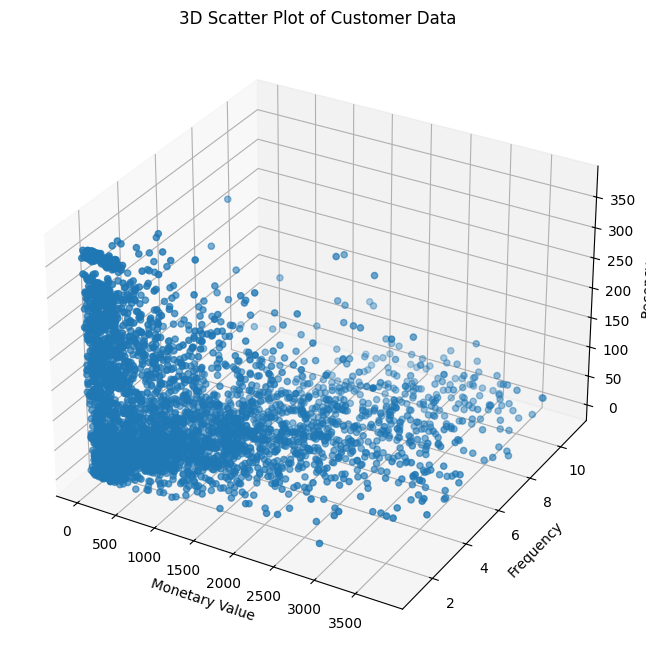

In [39]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')
plt.show()


Standard scaling transforms the features of your data to have a mean of 0 and a 

standard deviation of 1, ensuring that each feature contributes equally to the 

analysis

z=x-u/o

where:

    z is the standardized value

    x is the original value

    u is the mean of the feature

    o is the standard deviation of the feature

    

In [40]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue','Frequency','Recency']])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [41]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=( 'MonetaryValue', 'Frequency', 'Recency'))

scaled_data_df 

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


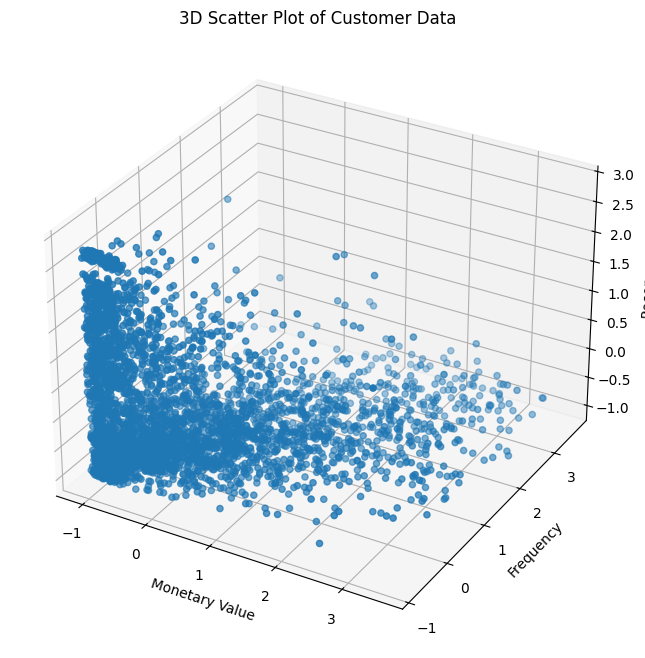

In [42]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')
plt.show()

KMeans Clustering 

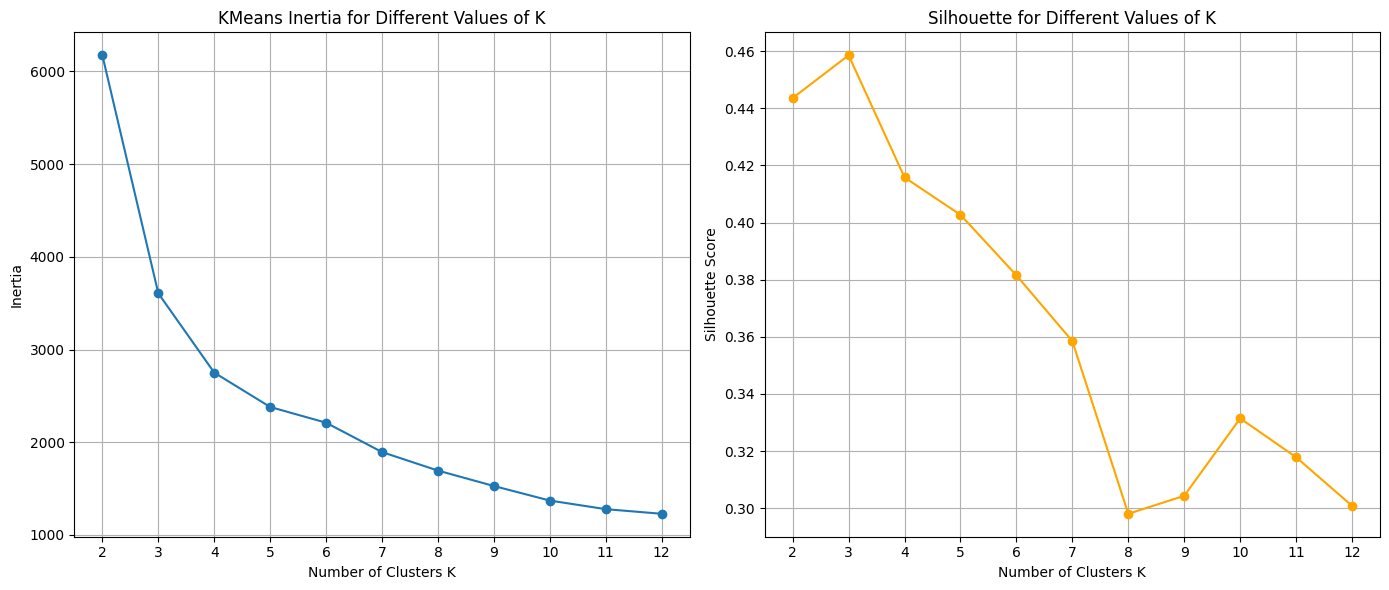

In [45]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of K')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values,silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette for Different Values of K')
plt.xlabel('Number of Clusters K')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout() 
plt.show()


Silhouette score

In [ ]:
kmeans = KMeans(n_clusters=4 , random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels 


array([1, 0, 2, ..., 1, 0, 0])

In [47]:
non_outliers_df['Cluster'] = cluster_labels

non_outliers_df 

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


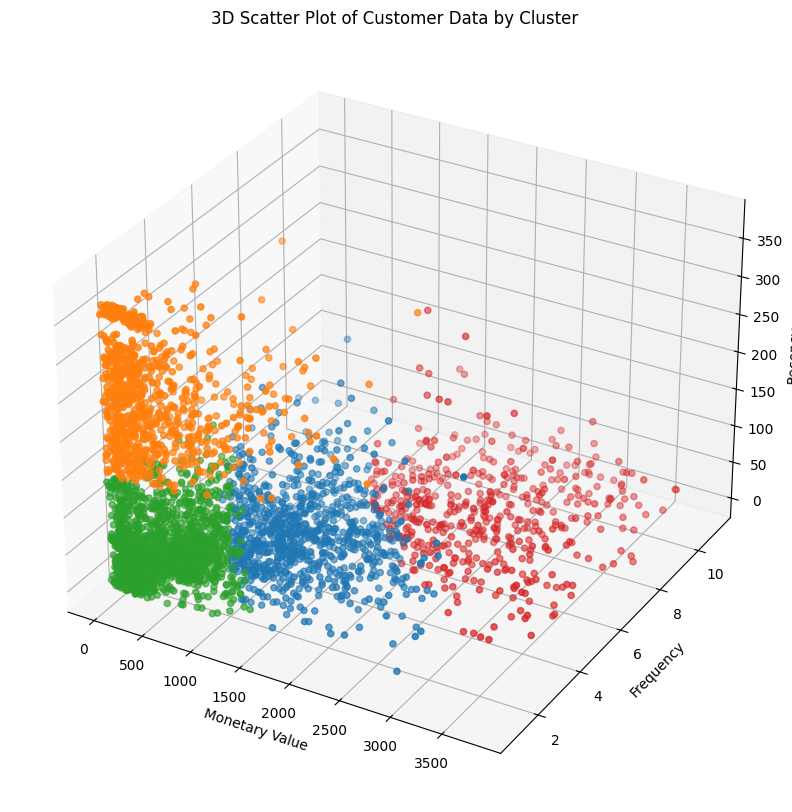

In [51]:
cluster_colors = {0:'#1f77b4',
                 1: '#ff7f0e',
                 2: '#2ca02c',
                 3: '#d62728'}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection= '3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c=colors,
                     marker = 'o')
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()



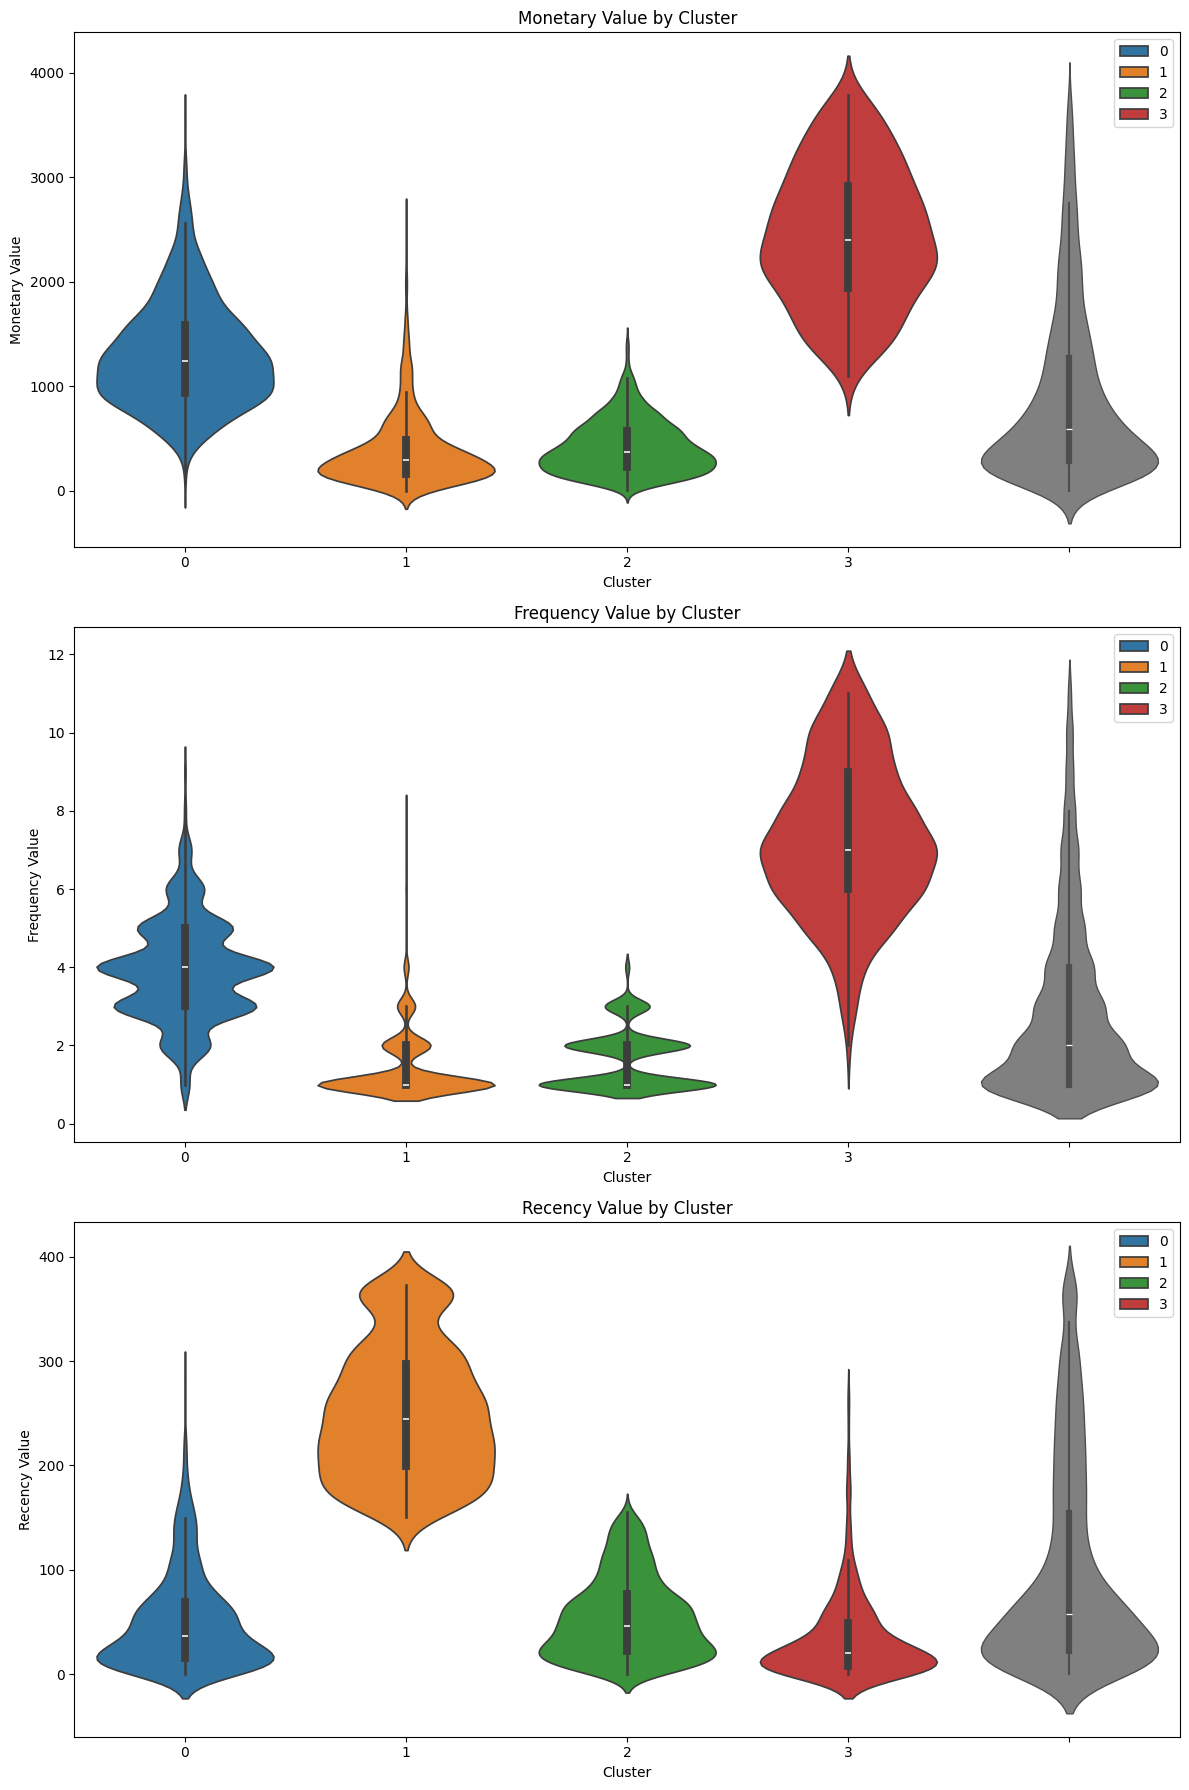

In [54]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['Cluster'], y =non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=non_outliers_df['Cluster'], y =non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency Value by Cluster')
plt.ylabel('Frequency Value')

plt.subplot(3,1,3)
sns.violinplot(x=non_outliers_df['Cluster'], y =non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency Value by Cluster')
plt.ylabel('Recency Value')

plt.tight_layout()
plt.show()


In [57]:
#Số lượng khách hàng trong từng nhóm
kmean_summary = non_outliers_df['Cluster'].value_counts().reset_index()
kmean_summary.columns = ['Cluster', 'Count']
print(kmean_summary)

   Cluster  Count
0        2   1499
1        0    914
2        1    902
3        3    494


1.Cluster 0 (blue): Retain ( Khách hàng sắp rời đi)

Why: Monetary high, Frequency high, Recency high 

Action: Khách hàng thân thiết, ưu đãi cá nhân hóa

2.Cluster 1 (Orange): Re-Engage (Khách hàng bỏ đi)

Why: Monetary low, Frequency normal, Recency low

Action: Marketing focus Customer, ưu đãi đặt biệt, khuyến khích khách hàng quây lại

3.Cluster 2 (Green): Nurture (Khách hàng mới)

Why: Monetary low, Frequency low, Recency low 

Action: Tạo dựng mối quan hệ, cung cấp dịch vụ khách hàng thân thiết, ưu đãi mua sắm thường xuyên.

4.Cluster 3 (Red): Reward (Khách hàng trung thành)

Why: Menotary high, Frequency high, Recency low

Action: Chương trình tri ân khách hàng, ưu đãi độc quyền, cá nhân hóa sản phẩm.





In [177]:
# Tính các mốc phần trăm 20%, 40%, 60%, 80%
rfm_quantiles = {
    'Recency': rfm['Recency'].quantile([0.2, 0.4, 0.6, 0.8]).tolist(),
    'Frequency': rfm['Frequency'].quantile([0.2, 0.4, 0.6, 0.8]).tolist(),
    'Monetary': rfm['Monetary'].quantile([0.2, 0.4, 0.6, 0.8]).tolist()
}

rfm_quantiles

{'Recency': [13.600000000000023, 33.0, 72.0, 179.0],
 'Frequency': [1.0, 2.0, 3.0, 6.0],
 'Monetary': [250.106, 489.72400000000005, 941.9419999999996, 2057.914]}

In [178]:
# Tính các giá trị phân vị (quantiles) cho R, F, M
rfm_quantiles = rfm.quantile([0.2, 0.4, 0.6, 0.8])

# Hàm gán điểm Recency (nhỏ hơn là tốt hơn)
def assign_r_score(value):
    if value <= rfm_quantiles['Recency'][0.2]:
        return 5
    elif value <= rfm_quantiles['Recency'][0.4]:
        return 4
    elif value <= rfm_quantiles['Recency'][0.6]:
        return 3
    elif value <= rfm_quantiles['Recency'][0.8]:
        return 2
    else:
        return 1

# Hàm gán điểm Frequency & Monetary (lớn hơn là tốt hơn)
def assign_fm_score(value, column):
    if value <= rfm_quantiles[column][0.2]:
        return 1
    elif value <= rfm_quantiles[column][0.4]:
        return 2
    elif value <= rfm_quantiles[column][0.6]:
        return 3
    elif value <= rfm_quantiles[column][0.8]:
        return 4
    else:
        return 5

# Áp dụng gán điểm cho từng khách hàng
rfm['R'] = rfm['Recency'].apply(assign_r_score)
rfm['F'] = rfm['Frequency'].apply(lambda x: assign_fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: assign_fm_score(x, 'Monetary'))

# Tạo cột RFM_Concat
rfm['RFM_Concat'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Hàm phân nhóm khách hàng theo R & F
def assign_segment(r, f):
    if (r >= 4 and f >= 4):
        return "Champions"
    elif (r >= 3 and f >= 4):
        return "Loyal Customers"
    elif (r >= 4 and f >= 2):
        return "Potential Loyalist"
    elif (r == 5 and f == 1):
        return "New Customers"
    elif (r == 4 and f == 1):
        return "Promising"
    elif (r == 3 and f == 3):
        return "Needing Attention"
    elif (r == 3 and f <= 2):
        return "About to Sleep"
    elif (r <= 2 and f >= 3):
        return "At Risk"
    elif (r <= 2 and f == 5):
        return "Can't Lose Them"
    elif (r <= 2 and f <= 2):
        return "Hibernating"
    else:
        return "Other"

# Gán nhãn phân nhóm
rfm['Segment'] = rfm.apply(lambda row: assign_segment(row['R'], row['F']), axis=1)

# Hiển thị kết quả
rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Concat', 'Segment']]

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Concat,Segment
0,12346,326,1,77183.60,1,1,5,115,Hibernating
1,12347,2,7,4310.00,5,5,5,555,Champions
2,12348,75,4,1797.24,2,4,4,244,At Risk
3,12349,19,1,1757.55,4,1,4,414,Promising
4,12350,310,1,334.40,1,1,2,112,Hibernating
...,...,...,...,...,...,...,...,...,...
4334,18280,278,1,180.60,1,1,1,111,Hibernating
4335,18281,181,1,80.82,1,1,1,111,Hibernating
4336,18282,8,2,178.05,5,2,1,521,Potential Loyalist
4337,18283,4,16,2094.88,5,5,5,555,Champions


In [179]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Concat,Segment
0,12346,326,1,77183.60,1,1,5,115,Hibernating
1,12347,2,7,4310.00,5,5,5,555,Champions
2,12348,75,4,1797.24,2,4,4,244,At Risk
3,12349,19,1,1757.55,4,1,4,414,Promising
4,12350,310,1,334.40,1,1,2,112,Hibernating


In [180]:
#Số lượng khách hàng trong từng nhóm
rfm_summary = rfm['Segment'].value_counts().reset_index()
rfm_summary.columns = ['Segment', 'Count']
print(rfm_summary)

              Segment  Count
0         Hibernating   1325
1           Champions   1035
2  Potential Loyalist    495
3      About to Sleep    476
4             At Risk    383
5     Loyal Customers    264
6           Promising    176
7   Needing Attention    118
8       New Customers     67


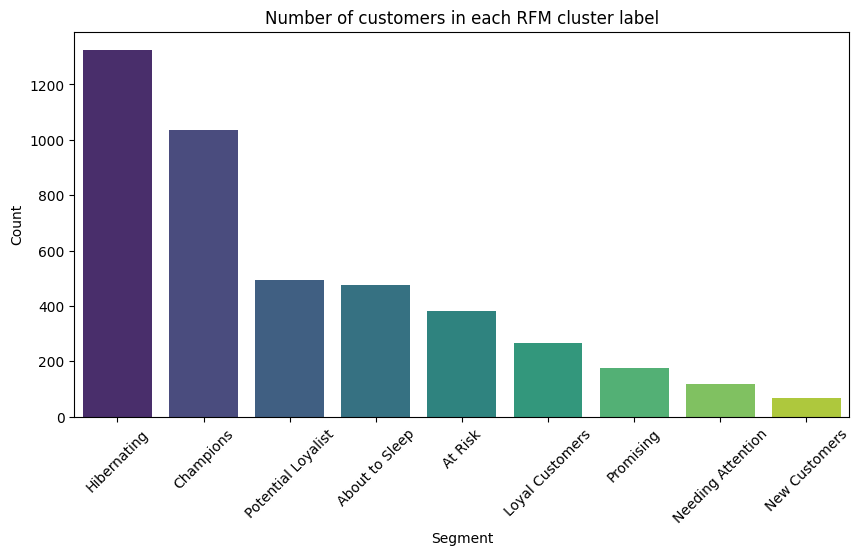

In [ ]:
# Đếm số lượng khách hàng trong từng nhóm
rfm_summary = rfm['Segment'].value_counts().reset_index()
rfm_summary.columns = ['Segment', 'Count']

#Vẽ biểu đồ thể hiện trực quan
plt.figure(figsize=(10, 5))
sns.barplot(x='Segment', y='Count', data=rfm_summary, palette="viridis")

plt.xlabel("Segment")
plt.ylabel("Count")
plt.title("Number of customers in each RFM cluster label")

plt.xticks(rotation=45)
plt.show()

In [182]:
# Lọc nhóm khách hàng 'Promising'
promising_df = rfm[rfm['Segment'] == 'Hibernating']

# Hiển thị thống kê mô tả
print(promising_df[['CustomerID', 'Recency', 'Frequency', 'Monetary']].describe())

         CustomerID      Recency    Frequency      Monetary
count   1325.000000  1325.000000  1325.000000   1325.000000
mean   15276.597736   209.600755     1.277736    511.718945
std     1742.762203    89.697813     0.448052   2186.609558
min    12346.000000    73.000000     1.000000      3.750000
25%    13740.000000   131.000000     1.000000    168.400000
50%    15258.000000   208.000000     1.000000    310.050000
75%    16756.000000   280.000000     2.000000    540.450000
max    18281.000000   374.000000     2.000000  77183.600000


In [183]:
# Lọc nhóm khách hàng 'Champions'
promising_df = rfm[rfm['Segment'] == 'Champions']

# Hiển thị thống kê mô tả
print(promising_df[['CustomerID', 'Recency', 'Frequency', 'Monetary']].describe())

         CustomerID      Recency    Frequency       Monetary
count   1035.000000  1035.000000  1035.000000    1035.000000
mean   15200.164251    12.797101    10.690821    5612.846474
std     1724.834481     9.414452    13.399640   16600.939191
min    12347.000000     1.000000     4.000000     201.120000
25%    13755.500000     4.000000     5.000000    1421.845000
50%    15058.000000    11.000000     7.000000    2473.370000
75%    16756.000000    19.000000    12.000000    4531.605000
max    18283.000000    33.000000   210.000000  280206.020000


In [184]:
# Lọc nhóm khách hàng 'New Customers'
promising_df = rfm[rfm['Segment'] == 'New Customers']

# Hiển thị thống kê mô tả
print(promising_df[['CustomerID', 'Recency', 'Frequency', 'Monetary']].describe())

         CustomerID    Recency  Frequency     Monetary
count     67.000000  67.000000       67.0    67.000000
mean   15102.328358   7.089552        1.0   348.637612
std     1804.101710   3.604422        0.0   477.750975
min    12367.000000   1.000000        1.0    41.990000
25%    13432.000000   4.000000        1.0   168.765000
50%    15148.000000   7.000000        1.0   246.300000
75%    16552.000000  11.000000        1.0   360.810000
max    18174.000000  12.000000        1.0  3861.000000
